# Image Statistics

In [10]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

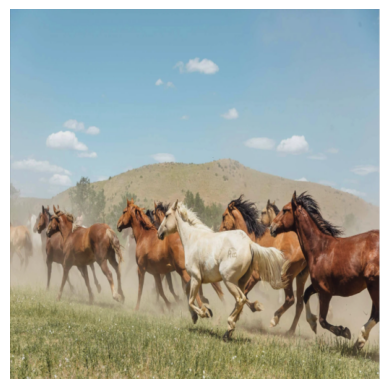

In [13]:
def load_image(image_path, size=512):
    """
    Load an image, resize it, and convert it to a PyTorch tensor.
    
    Parameters:
    image_path (str): Path to the image file.
    size (int): The size to which the image should be resized.
    
    Returns:
    torch.Tensor: The preprocessed image tensor.
    """
    image = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB mode
    transform = transforms.Compose([
        transforms.Resize((size, size)),  # Resize image
        transforms.ToTensor(),  # Convert to tensor
    ])
    
    return transform(image).unsqueeze(0)  # Add batch dimension

# Example: Load an image (replace 'path_to_image.jpg' with the actual path)
image_path = '/Users/ayberk.cansever/Documents/ECU/Thesis/SAM/sources/image-1.png'
image_tensor = load_image(image_path)

# Display the image
plt.imshow(transforms.ToPILImage()(image_tensor.squeeze(0)))
plt.axis('off')
plt.show()

# Mean of the Image

In [16]:
mean_per_channel = torch.mean(image_tensor, dim=(2, 3))
print(f"Mean per channel (R, G, B): {mean_per_channel}")

Mean per channel (R, G, B): tensor([[0.5937, 0.6200, 0.5874]])


# Variance of the Image

In [18]:
variance_per_channel = torch.var(image_tensor, dim=(2, 3))
print(f"Variance per channel (R, G, B): {variance_per_channel}")

Variance per channel (R, G, B): tensor([[0.0178, 0.0268, 0.0521]])


# Extract Features from a Pre-trained CNN (VGG-19)

In [20]:
# Load pre-trained VGG-19 model
vgg = models.vgg19(pretrained=True).features.eval()

# Move the model and image tensor to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg.to(device)
image_tensor = image_tensor.to(device)

# Extract features from a specific layer (e.g., conv4_1, which is layer '19')
def extract_vgg_features(image, model, layer='19'):
    features = image
    for name, layer_module in model._modules.items():
        features = layer_module(features)
        if name == layer:
            break
    return features

# Extract features from the image
features = extract_vgg_features(image_tensor, vgg, layer='19')
print(f"Feature shape: {features.shape}")  # Should be something like [1, 512, 64, 64]

Feature shape: torch.Size([1, 512, 64, 64])


# Mean of the Feature Maps

In [22]:
feature_mean = torch.mean(features, dim=(2, 3))
print(f"Mean of feature maps: {feature_mean.shape}\n{feature_mean}")

Mean of feature maps: torch.Size([1, 512])
tensor([[-1.7377, -0.8026, -1.7176, -1.9344, -1.5501, -4.2419, -2.5009, -2.6911,
         -2.3462, -1.6499, -4.9716, -3.5154, -3.9201, -1.9994, -3.5565, -0.3566,
         -0.6361, -3.8646,  0.1059, -5.6583, -4.4672, -1.5752, -2.4158, -0.6346,
         -5.3052, -1.1671, -2.4815, -1.7463, -1.7825,  2.1015, -3.2210, -2.3129,
         -2.9996, -4.2430, -0.8020, -2.6974, -1.3726, -1.9802, -0.3714, -3.4757,
         -3.7373, -6.6582, -0.3507, -1.9626, -1.2738, -1.0682, -3.3248, -2.1264,
         -3.5706, -2.4643, -2.2288, -3.0681, -2.3645, -1.6485, -2.2197, -2.7621,
         -2.2204, -1.9459, -1.5519, -2.6028, -1.8890, -2.5601, -2.5079, -3.2356,
         -0.8213, -2.3309, -2.1032, -3.3685, -1.5112, -2.5443, -0.4848, -2.0721,
         -1.7535,  2.0237, -1.5646, -4.8076, -1.8525, -4.0851,  2.2227, -1.4348,
         -1.0397, -4.1959, -3.2407, -3.1054, -1.8437, -3.6407, -2.5348, -2.9897,
         -0.9923, -4.4546, -4.0719, -1.6686, -5.4270, -1.9737, -2.

# Variance of the Feature Maps

In [23]:
feature_variance = torch.var(features, dim=(2, 3))
print(f"Variance of feature maps: {feature_variance.shape}\n{feature_variance}")

Variance of feature maps: torch.Size([1, 512])
tensor([[18.9395, 14.2950, 16.0051, 10.8274, 10.7159, 19.7386, 10.4181, 18.6308,
         25.2679, 11.4162, 13.0415, 30.5190, 25.6035, 11.5653, 19.0866, 12.9449,
         26.4146, 20.2597, 19.3967, 36.8134, 35.4637, 13.1992, 10.1380,  6.8715,
         46.9401, 15.9843, 24.0685, 13.9310, 19.0125,  7.8528, 19.0253, 21.9938,
         14.0739, 21.1437, 17.7644, 20.3206, 11.5667, 12.6156, 10.7854, 16.4457,
         25.4182, 38.6160, 13.7871, 19.0485, 23.3027,  8.3835, 14.3033,  9.5851,
         17.1173, 10.2038, 37.0590, 10.9096, 24.6352, 14.4105, 14.4100, 13.0403,
         14.0397, 13.0678, 19.0998, 19.6790, 10.4178, 33.1220, 31.4257, 28.0410,
         11.0108, 13.7541, 28.7081, 19.3759,  7.2818, 15.0136,  6.7996, 15.9844,
         12.9748, 17.3519, 11.0556, 23.6833, 12.2312, 12.2512, 13.0489, 16.3417,
         12.1201, 14.0154, 17.6220, 10.6899, 28.7853, 26.6739, 20.0850, 20.7555,
         14.7681, 16.1821, 24.2073, 14.7673, 15.9281, 15.3848,

# Covariance Matrix of the Feature Maps

In [25]:
# Flatten the feature maps across the height and width (convert to 2D: num_features x num_pixels)
batch_size, num_channels, height, width = features.shape
features_flat = features.view(batch_size, num_channels, -1)

# Subtract the mean from the feature maps
mean_flat = torch.mean(features_flat, dim=2, keepdim=True)
features_flat = features_flat - mean_flat

# Compute the covariance matrix of the feature maps (num_channels x num_channels)
covariance_matrix = torch.bmm(features_flat, features_flat.transpose(1, 2)) / (height * width)
print(f"Covariance matrix shape: {covariance_matrix.shape}\n{covariance_matrix[0]}")

Covariance matrix shape: torch.Size([1, 512, 512])
tensor([[18.9348, -1.5626,  2.8687,  ..., -0.0231,  2.3771,  6.3444],
        [-1.5626, 14.2916, -0.7282,  ..., -1.2016, -2.6382,  3.9019],
        [ 2.8687, -0.7282, 16.0012,  ...,  1.4575,  5.6207,  4.8770],
        ...,
        [-0.0231, -1.2016,  1.4575,  ..., 10.3151,  1.4610,  1.9477],
        [ 2.3771, -2.6382,  5.6207,  ...,  1.4610, 18.6693,  6.1248],
        [ 6.3444,  3.9019,  4.8770,  ...,  1.9477,  6.1248, 22.0410]],
       grad_fn=<SelectBackward0>)


# Gram Matrix of the Feature Maps

In [26]:
def gram_matrix(features):
    """
    Compute the Gram matrix of the given features.
    
    Parameters:
    features (torch.Tensor): The input feature maps (batch_size, num_channels, height, width).
    
    Returns:
    torch.Tensor: The Gram matrix (batch_size, num_channels, num_channels).
    """
    batch_size, num_channels, height, width = features.size()
    features_flat = features.view(batch_size, num_channels, height * width)
    gram = torch.bmm(features_flat, features_flat.transpose(1, 2)) / (num_channels * height * width)
    return gram

# Compute the Gram matrix
gram = gram_matrix(features)
print(f"Gram matrix shape: {gram.shape}\n{gram[0]}")

Gram matrix shape: torch.Size([1, 512, 512])
tensor([[ 0.0429, -0.0003,  0.0114,  ...,  0.0042,  0.0169,  0.0165],
        [-0.0003,  0.0292,  0.0013,  ..., -0.0004,  0.0005,  0.0095],
        [ 0.0114,  0.0013,  0.0370,  ...,  0.0070,  0.0230,  0.0136],
        ...,
        [ 0.0042, -0.0004,  0.0070,  ...,  0.0232,  0.0116,  0.0068],
        [ 0.0169,  0.0005,  0.0230,  ...,  0.0116,  0.0617,  0.0205],
        [ 0.0165,  0.0095,  0.0136,  ...,  0.0068,  0.0205,  0.0460]],
       grad_fn=<SelectBackward0>)
